<a href="https://colab.research.google.com/github/Gdan0326/Caffeine_Content_Metrics/blob/main/2nd_dataset_Second_Project_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

SOURCE: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-datasetSOURCE: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

In [3]:
# load data
file = '/content/drive/MyDrive/Colab Notebooks/Data/heart_attack_prediction_dataset.csv'
df = pd.read_csv(file)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
# remove column truncation
pd.set_option('display.max_columns', None)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
df.shape
# data contains 8763 rows x 22 cols

(8763, 26)

In [6]:
# Brief description of data
# the data contains contain various health, lifestyle, and demographic information of patients. It has features such as age,
# sex, cholesterol level, blood pressure, heart rate, diabetes status,
# family history of heart diseases, smoking habits, BMI, income, country of residence, etc.

In [7]:
# what is the target?
# The target feature for this data set would be 'Heart Attack Risk'


In [8]:
# # How many features?
# 24 features excluding Patient ID


In [9]:
# How many rows of data?
# 8763 rows

In [10]:
# What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?
# Missing data
# data is not balanced
# erroneous data
# duplicate data

In [11]:
# Overview of the columns:

# Patient ID: A unique identifier for each patient.
# Age: Age of the patient.
# Sex: Male or Female
# Cholesterol: Cholesterol level
# Blood Pressure: Blood pressure measurement
# Heart Rate: Heart rate measurement
# Diabetes: Whether the patient has diabetes (1 for Yes, 0 for No)
# Heart Attack Risk: The target variable indicating if the patient is at risk of a heart attack (1 for Yes, 0 for No).

In [12]:
# check data statistics
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


DATA CLEANING

In [13]:
# Drop unnecessary columns, in this data set Patient ID is irrelevant
df.drop('Patient ID', axis=1, inplace=True)

In [14]:
df.duplicated().sum()
# no duplicated values

0

In [15]:
# Number_of_weeknight_reservations should be int
df.dtypes
# data types seems to be consistent with each of the columns in the data set

Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [16]:
# check for other missing values in the df
df.isnull().sum()
# No missing data in the df

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [17]:
# Check for unique values in the categorical columns
categorical_columns = ['Sex', 'Country', 'Continent', 'Hemisphere']
unique_values = {col:df[col].unique() for col in categorical_columns}

In [18]:
unique_values
# no erroneous data in the categorical columns

{'Sex': array(['Male', 'Female'], dtype=object),
 'Country': array(['Argentina', 'Canada', 'France', 'Thailand', 'Germany', 'Japan',
        'Brazil', 'South Africa', 'United States', 'Vietnam', 'China',
        'Italy', 'Spain', 'India', 'Nigeria', 'New Zealand', 'South Korea',
        'Australia', 'Colombia', 'United Kingdom'], dtype=object),
 'Continent': array(['South America', 'North America', 'Europe', 'Asia', 'Africa',
        'Australia'], dtype=object),
 'Hemisphere': array(['Southern Hemisphere', 'Northern Hemisphere'], dtype=object)}

# Univariate Analysis for target and features

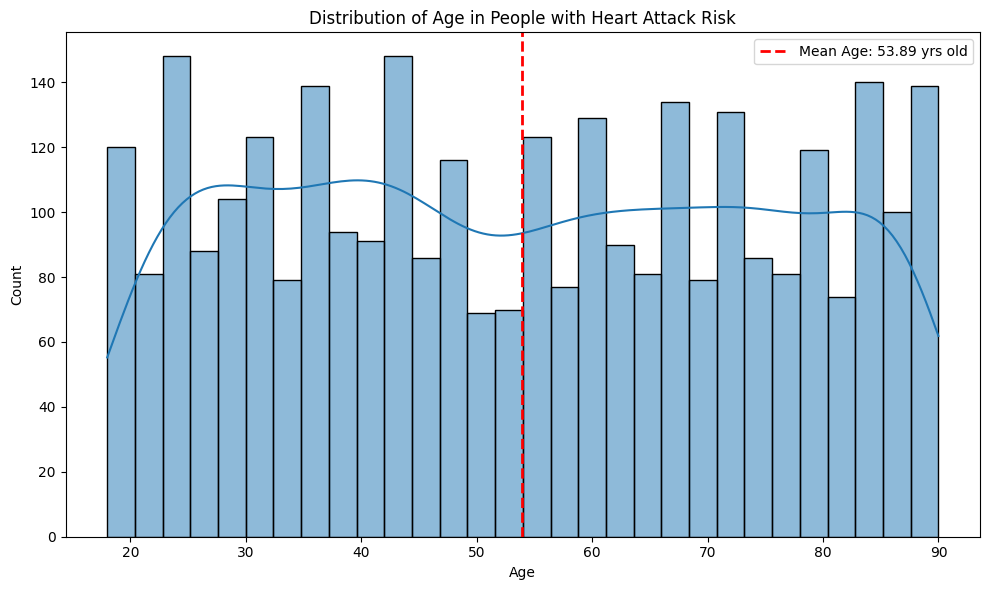

In [19]:
# Filter the dataset where 'Heart Attack Risk' is 1.
age_filter = df[df['Heart Attack Risk'] == 1]
mean_age = age_filter['Age'].mean()

# Plot the distribution of 'Age' for patients with heart attack risk
plt.figure(figsize=(10, 6))
sns.histplot(age_filter['Age'], kde=True, bins=30)
plt.axvline(mean_age, color='r', linestyle='dashed', linewidth=2, label=f"Mean Age: {mean_age:.2f} yrs old")
plt.title('Distribution of Age in People with Heart Attack Risk')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# The age distribution  is broad, this means that individuals across a wide age range are at risk of a heart attack.
# mean age for people at risk for heart attack is mid 50's, this suggests that it is important to monitor heart condition for people nearning this age

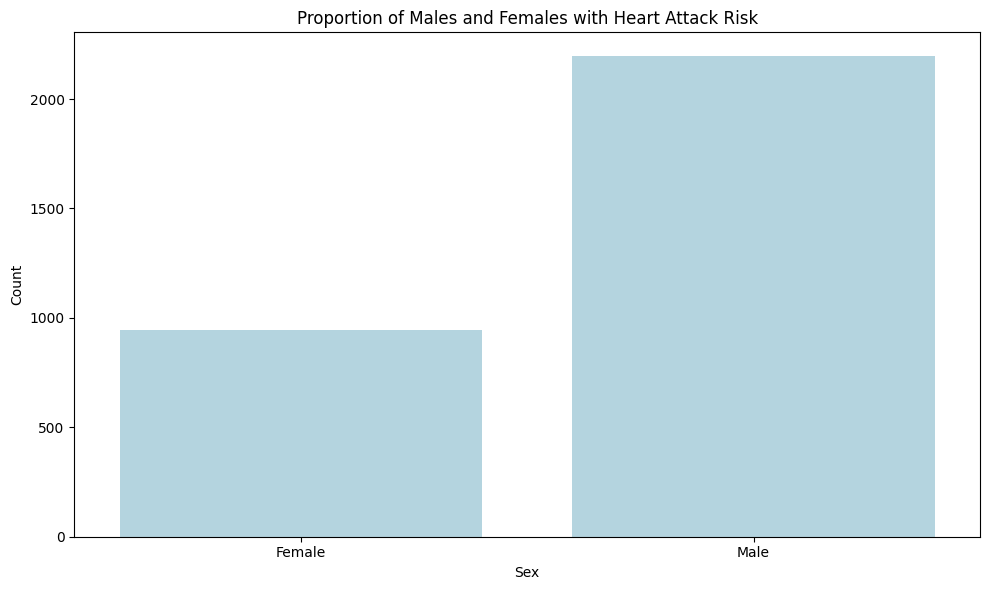

In [21]:
# Filter the dataset where 'Heart Attack Risk' is 1.
sex_filter = df[df['Heart Attack Risk'] == 1]

# Plot the distribution of 'Age' for patients with heart attack risk
plt.figure(figsize=(10, 6));
sns.countplot(data=sex_filter, x='Sex', color='lightblue');
plt.title('Proportion of Males and Females with Heart Attack Risk');
plt.xlabel('Sex');
plt.ylabel('Count');
plt.tight_layout();
plt.show();

In [22]:
# The plot shows that heart attack are more common in male than females

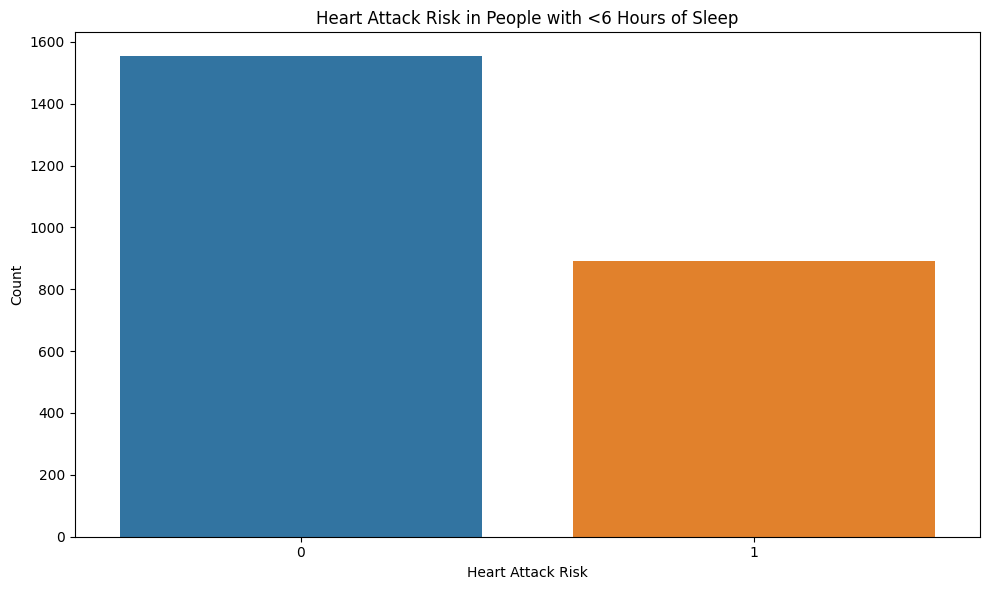

In [35]:
# Filter the dataset for patients with less than 6 hours of sleep
sleep_filter = df[df['Sleep Hours Per Day'] < 6]
# Plot the distribution of 'Heart Attack Risk' for these patients
plt.figure(figsize=(10, 6))
sns.countplot(data=sleep_filter, x='Heart Attack Risk', label='<6 Hours Sleep')
plt.title('Heart Attack Risk in People with <6 Hours of Sleep')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [24]:
# This visualization suggests that among those who sleep less than 6 hours, there is a subset that is indeed at risk of a heart attack. It emphasizes the importance of considering sleep duration as
#  a potential factor for heart attack risk.

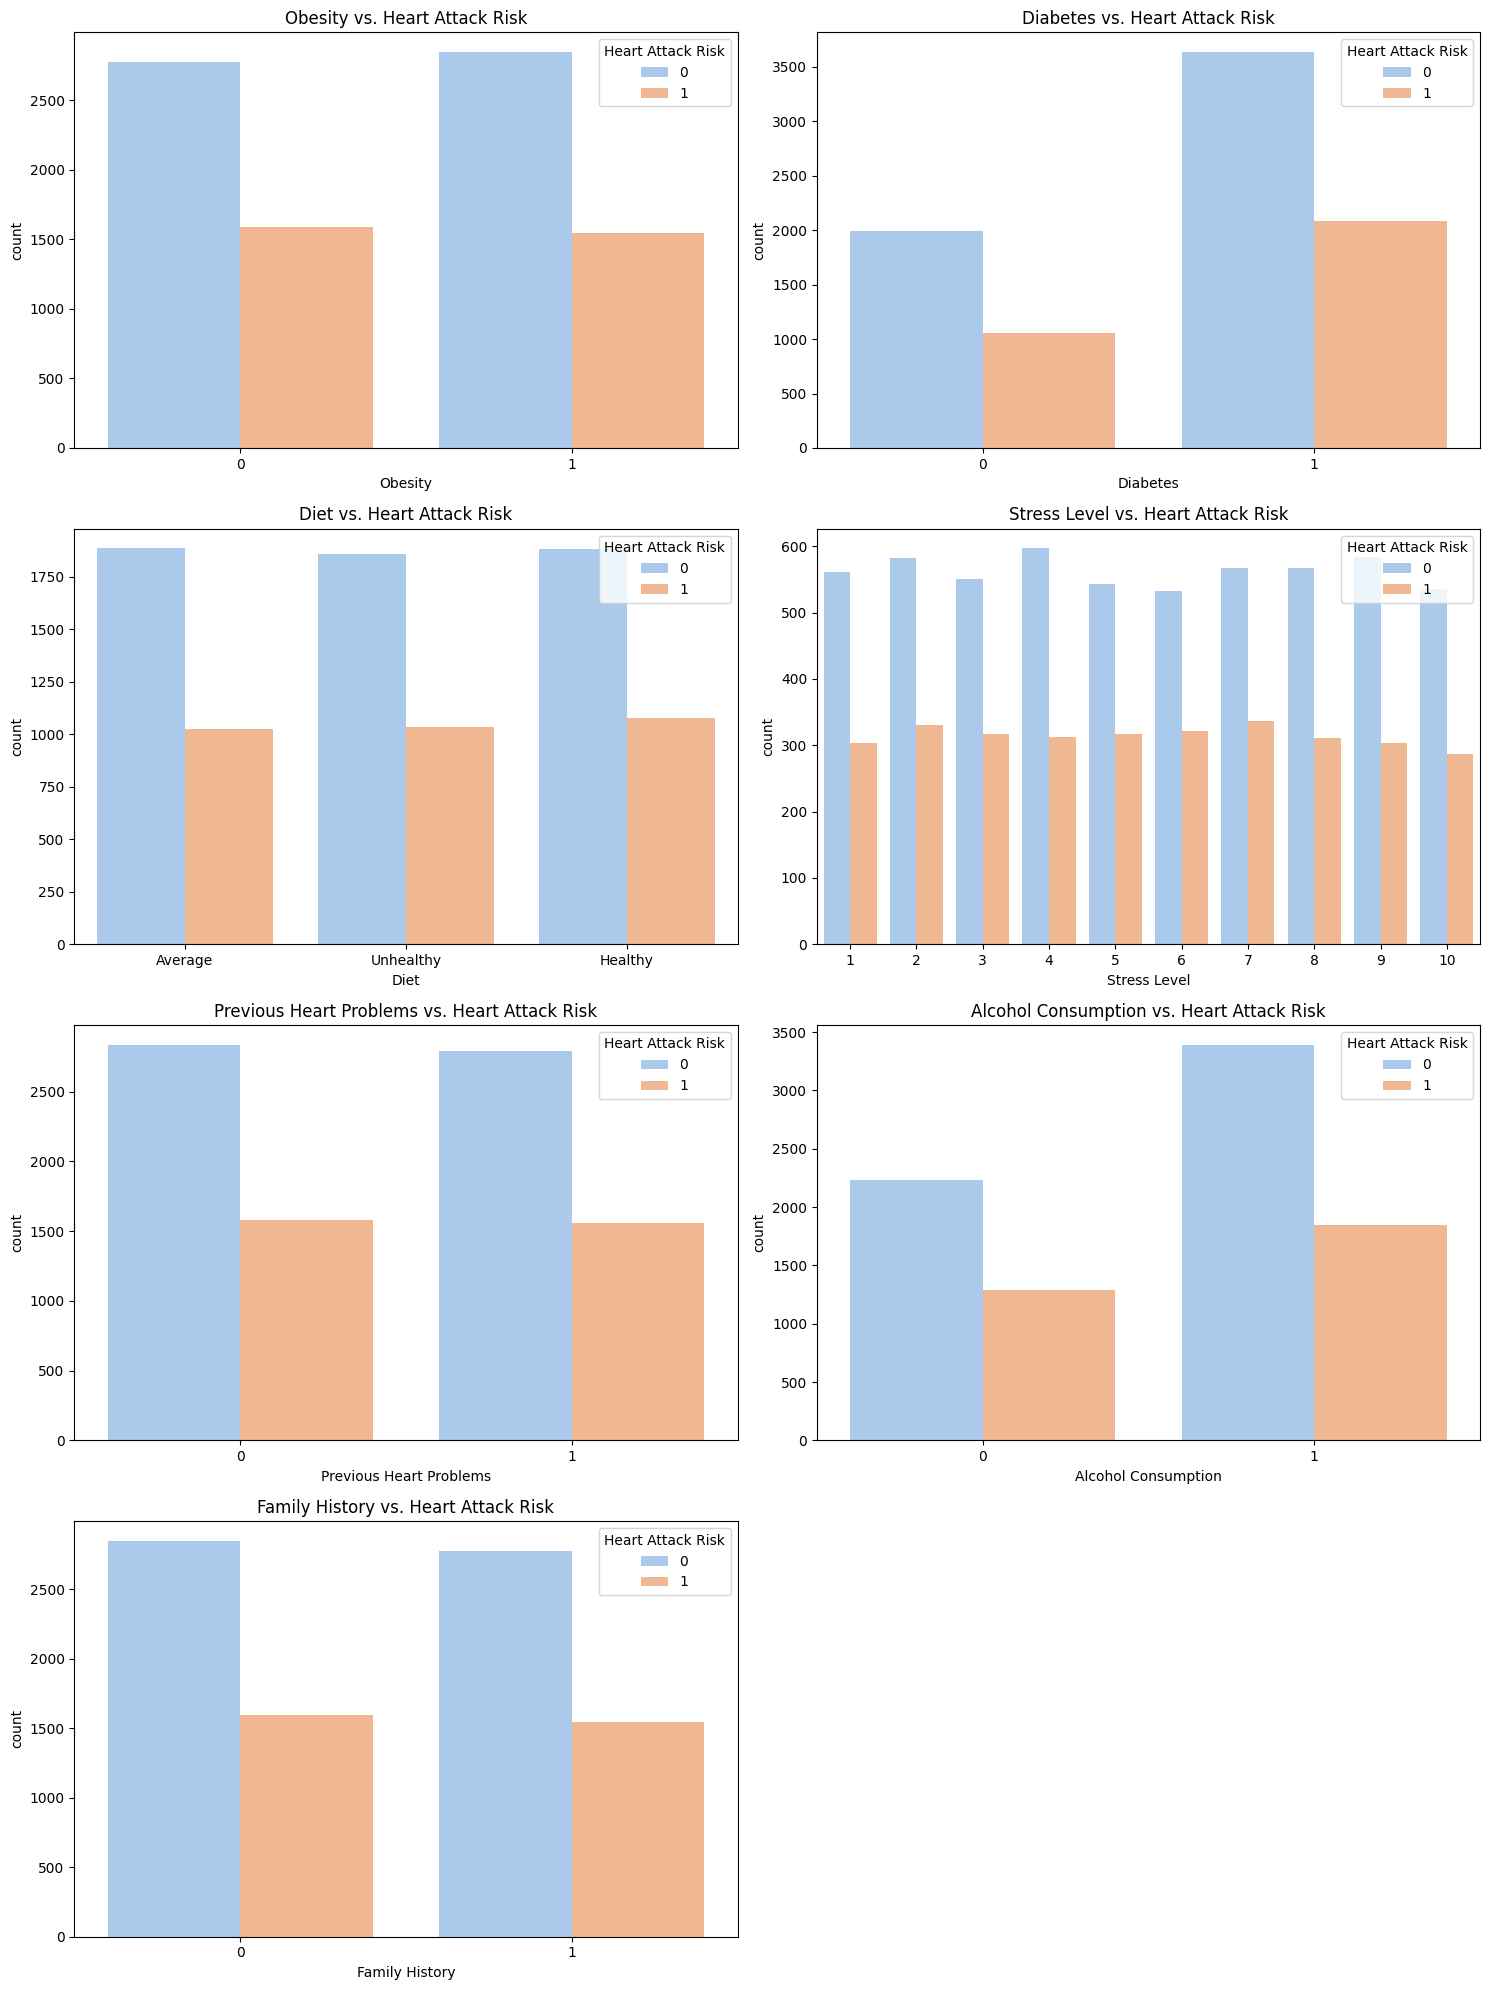

In [38]:
# filter categorical and numerical features
categorical_features = ['Obesity', 'Diabetes', 'Diet', 'Stress Level', 'Previous Heart Problems',
                        'Alcohol Consumption', 'Family History']
numerical_features = ['Exercise Hours Per Week', 'BMI']

# Plot for categorical features
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=feature, hue='Heart Attack Risk', palette='pastel')
    plt.title(f'{feature} vs. Heart Attack Risk')
    plt.tight_layout()

plt.show()

# As shown in the plot higher number of non-obese individuals are identified as not at risk for heart attack, while there are signficant individuals with obesity that are at risk for heart attack, the same interpretation goes for people with diabetes, non-diabetic individuals post no risk for heart attack. Diet features on the other hand, has varying distributions across heart attack risks, same is true with stress levels and alcohol consumption. People with no Family history of heart attack and  previous heart problem, are higher in number in terms of non-risk for heart attack



In [25]:
df['Diet'].value_counts()

Healthy      2960
Average      2912
Unhealthy    2891
Name: Diet, dtype: int64

In [26]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk'],
      dtype='object')

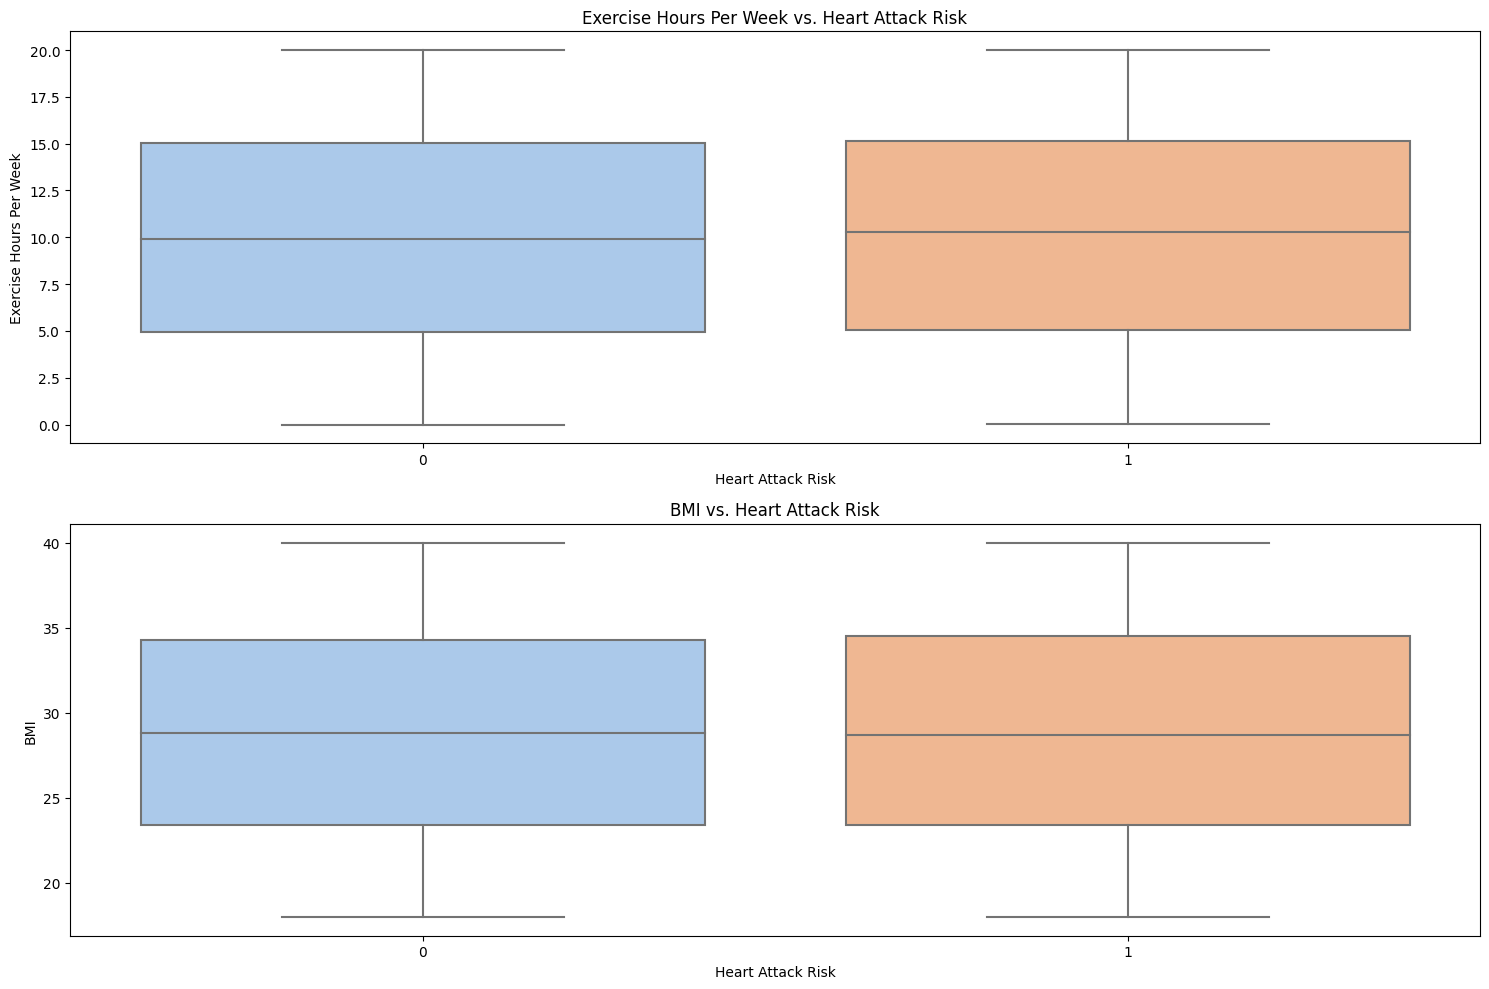

In [40]:
# Numerical feature plot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 1, i)
    sns.boxplot(data=df, x='Heart Attack Risk', y=feature, palette='pastel')
    plt.title(f'{feature} vs. Heart Attack Risk')
    plt.tight_layout()

plt.show()

In [ ]:
# there is a noticeable difference in exercise habits= between two groups, individuals at risk for heart attack has very little to no exercise as compared to people who has physical activities
# from the plot it can be inferred that higher median BMI post risk for heart attack

Correlation matrix and heatmap

<ipython-input-45-a8e38c30b91b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


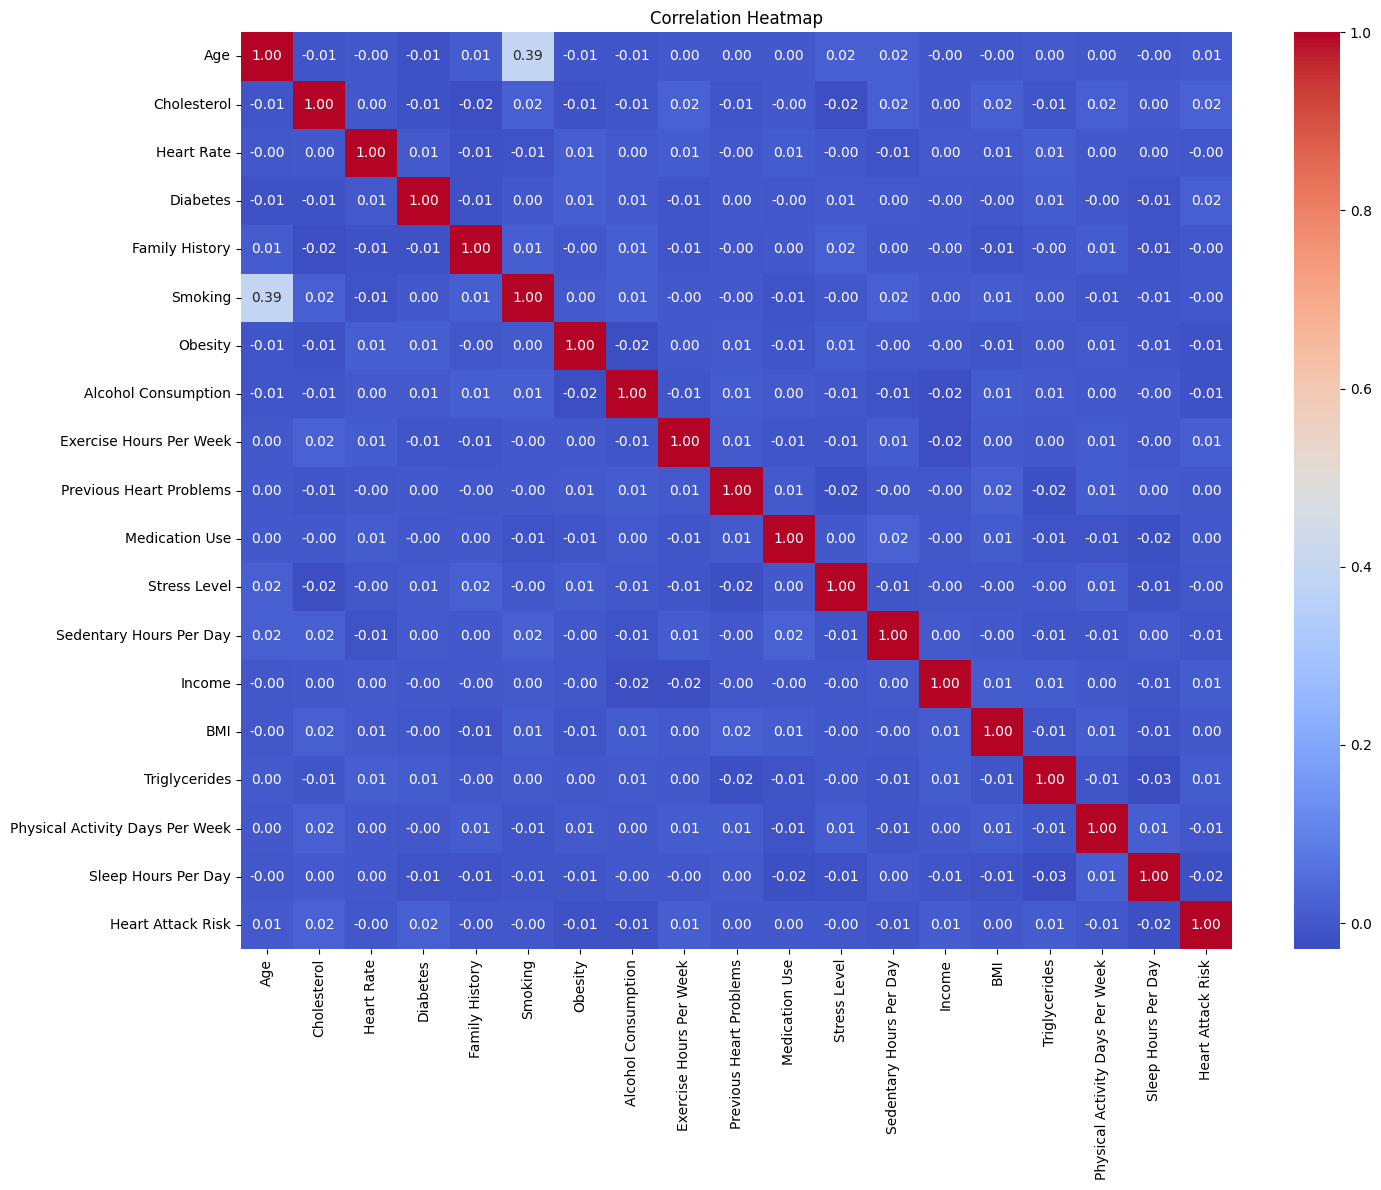

In [45]:
# correlation matrix
correlation_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True, fmt = '.2f');
plt.title('Correlation Heatmap or Heart Attack Risk')
plt.tight_layout()
plt.show();

In [ ]:
# Interpretation
# 0.30 - 0.50 = there is a weak + correlation
# 0.51 - 0.70 = there is a moderate + correlation
# 0.71 - 0.90 = there is a strong + correlation
# 0.91 - 1.00 = there is vstrong + correlation (perfect)

In [ ]:
# From the graph, it shows that there is a week positive correlation between smoking and age